In [1]:
#imports
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#AAA = 'Corp_Bond_AAA.csv'
#BBB = 'Corp_Bond_BBB.csv'
#B = 'Corp_Bond_B.csv'
# Bond Data
#Corp_Bond_AAA_df= pd.read_csv(AAA)
#Corp_Bond_BBB_df= pd.read_csv(BBB)
#Corp_Bond_B_df= pd.read_csv(B)
#shape of data
#print(Corp_Bond_AAA_df.shape)
#print(Corp_Bond_BBB_df)
#print(Corp_Bond_B_df)

In [3]:
SP500 = 'S&P_500_1M_Futures.csv'
SP500_df= pd.read_csv(SP500)
SP500_df.tail()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
9540,4/27/1982,120.20,120.35,118.40,118.85,NaN,118.85,3854,1142
9541,4/26/1982,119.30,120.60,118.65,120.55,NaN,120.55,2871,1084
9542,4/23/1982,118.40,119.75,118.25,119.65,NaN,119.65,2933,946
9543,4/22/1982,117.00,118.40,117.00,117.90,NaN,117.90,2827,719
9544,4/21/1982,116.35,117.60,116.05,117.45,NaN,117.45,3696,412


In [4]:
SP500_df = SP500_df.sort_index(axis=0, ascending=False)
SP500_df.head()


,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
9544,4/21/1982,116.35,117.60,116.05,117.45,NaN,117.45,3696,412
9543,4/22/1982,117.00,118.40,117.00,117.90,NaN,117.90,2827,719
9542,4/23/1982,118.40,119.75,118.25,119.65,NaN,119.65,2933,946
9541,4/26/1982,119.30,120.60,118.65,120.55,NaN,120.55,2871,1084
9540,4/27/1982,120.20,120.35,118.40,118.85,NaN,118.85,3854,1142


In [5]:
sp500_percent_return = []
previous_price = 117.45
for index , row in SP500_df.iterrows():
    Settle_row = row["Settle"]
    dailySP500_return = (Settle_row - previous_price) / previous_price *100
    sp500_percent_return.append(round(dailySP500_return, 2))
    previous_price = Settle_row
SP500_df.insert(1,"SP Daily Pct Return", sp500_percent_return)
SP500_df.head()


,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
9544,4/21/1982,0.00,116.35,117.60,116.05,117.45,NaN,117.45,3696,412
9543,4/22/1982,0.38,117.00,118.40,117.00,117.90,NaN,117.90,2827,719
9542,4/23/1982,1.48,118.40,119.75,118.25,119.65,NaN,119.65,2933,946
9541,4/26/1982,0.75,119.30,120.60,118.65,120.55,NaN,120.55,2871,1084
9540,4/27/1982,-1.41,120.20,120.35,118.40,118.85,NaN,118.85,3854,1142


In [6]:
#SP500["Date"] = pd.to_datetime(SP500_df["Date"])

In [7]:
SP500_df["Date"] = pd.to_datetime(SP500_df["Date"])

In [8]:
SP87_df = SP500_df.loc[(SP500_df["Date"] >= "1987-01-02") & 
                                   (SP500_df["Date"] <= "1987-10-31")]
SP87_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
8355,1987-01-02,1.90,243.40,247.70,243.40,246.75,NaN,246.75,36835,92485
8354,1987-01-05,2.63,248.60,254.15,248.30,253.25,NaN,253.25,77749,96198
8353,1987-01-06,0.12,252.90,254.85,252.50,253.55,NaN,253.55,79860,96491
8352,1987-01-07,1.06,253.45,257.20,253.10,256.25,NaN,256.25,81540,100098
8351,1987-01-08,0.41,255.95,257.55,255.45,257.30,NaN,257.30,75884,103025
...,...,...,...,...,...,...,...,...,...,...
8149,1987-10-26,-8.61,228.00,237.00,218.00,220.25,NaN,220.25,34416,146846
8148,1987-10-27,3.79,242.00,242.00,223.00,228.60,NaN,228.60,30322,145022
8147,1987-10-28,1.16,220.00,234.50,218.00,231.25,NaN,231.25,36490,143775
8146,1987-10-29,6.25,237.00,249.10,235.00,245.70,NaN,245.70,35484,138609


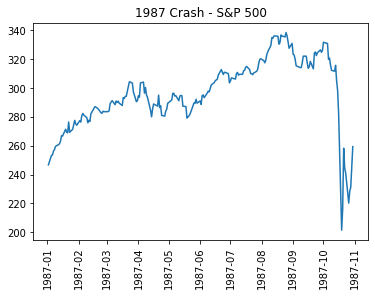

In [9]:
plt.plot(SP87_df['Date'],SP87_df['Settle'])
plt.title("1987 Crash - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [11]:
SPLTCM_df = SP500_df.loc[(SP500_df["Date"] >= "1997-10-01") & 
                                   (SP500_df["Date"] <= "1998-10-31")]
SPLTCM_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
5638,1997-10-01,0.93,959.00,966.50,955.80,963.40,NaN,963.40,63556,184068
5637,1997-10-02,0.59,962.75,969.70,961.10,969.10,NaN,969.10,41070,186328
5636,1997-10-03,0.66,983.00,985.50,961.75,975.45,NaN,975.45,73132,187231
5635,1997-10-06,0.62,980.50,983.70,976.85,981.50,NaN,981.50,48174,186746
5634,1997-10-07,0.83,981.00,992.25,980.10,989.60,NaN,989.60,54013,189620
...,...,...,...,...,...,...,...,...,...,...
5369,1998-10-26,0.60,1079.00,1090.00,1073.50,1080.50,NaN,1080.50,73499,391959
5368,1998-10-27,-0.56,1088.00,1093.50,1067.50,1074.50,NaN,1074.50,100215,391382
5367,1998-10-28,-0.33,1071.50,1079.00,1065.50,1071.00,NaN,1071.00,84789,393261
5366,1998-10-29,2.38,1072.50,1097.00,1070.50,1096.50,NaN,1096.50,84009,391979


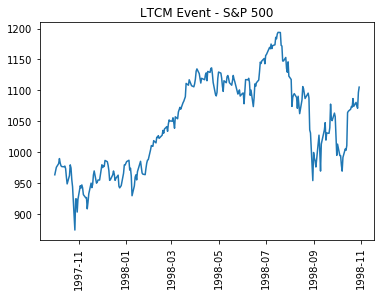

In [12]:
plt.plot(SPLTCM_df['Date'],SPLTCM_df['Settle'])
plt.title("LTCM Event - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [13]:
SPtech_df = SP500_df.loc[(SP500_df["Date"] >= "1999-01-02") & 
                                   (SP500_df["Date"] <= "2000-09-30")]
SPtech_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
5322,1999-01-04,-0.37,1247.0,1261.0,1227.0,1240.9,NaN,1240.9,93498,373370
5321,1999-01-05,0.99,1239.0,1258.0,1239.0,1253.2,NaN,1253.2,88132,379987
5320,1999-01-06,2.15,1263.0,1285.7,1263.0,1280.2,NaN,1280.2,101903,381198
5319,1999-01-07,-0.19,1267.5,1280.8,1266.5,1277.8,NaN,1277.8,99305,382498
5318,1999-01-08,0.72,1289.0,1290.5,1271.0,1287.0,NaN,1287.0,101866,382942
...,...,...,...,...,...,...,...,...,...,...
4886,2000-09-25,-0.51,1476.5,1477.5,1455.5,1461.0,NaN,1461.0,58289,382195
4885,2000-09-26,-1.23,1461.0,1467.0,1442.5,1443.0,NaN,1443.0,65903,385040
4884,2000-09-27,0.28,1452.0,1456.0,1438.0,1447.0,NaN,1447.0,68106,387404
4883,2000-09-28,2.00,1446.0,1480.9,1445.0,1476.0,NaN,1476.0,68350,390154


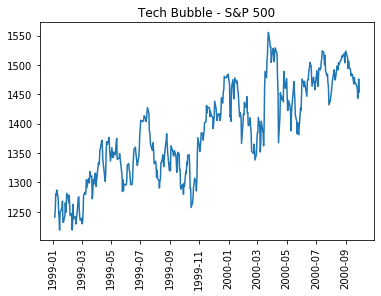

In [14]:
plt.plot(SPtech_df['Date'],SPtech_df['Settle'])
plt.title("Tech Bubble - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [15]:
SP911_df = SP500_df.loc[(SP500_df["Date"] >= "2000-01-02") & 
                                   (SP500_df["Date"] <= "2001-10-31")]
SP911_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
5070,2000-01-03,-1.17,1495.0,1496.5,1452.0,1466.8,NaN,1466.8,90837,357136
5069,2000-01-04,-3.75,1450.0,1453.5,1409.5,1411.8,NaN,1411.8,106556,357783
5068,2000-01-05,0.12,1409.0,1427.5,1387.0,1413.5,NaN,1413.5,121252,358114
5067,2000-01-06,-0.67,1405.5,1425.8,1401.0,1404.0,NaN,1404.0,92919,354417
5066,2000-01-07,4.02,1413.8,1461.0,1412.0,1460.5,NaN,1460.5,88738,354368
...,...,...,...,...,...,...,...,...,...,...
4616,2001-10-25,1.63,1072.5,1104.5,1066.0,1102.7,NaN,1102.7,80989,517644
4615,2001-10-26,-0.06,1097.0,1112.5,1095.0,1102.0,NaN,1102.0,56501,514026
4614,2001-10-29,-2.63,1099.7,1103.5,1072.5,1073.0,NaN,1073.0,68828,511295
4613,2001-10-30,-1.29,1070.5,1071.0,1053.5,1059.2,NaN,1059.2,79708,509011


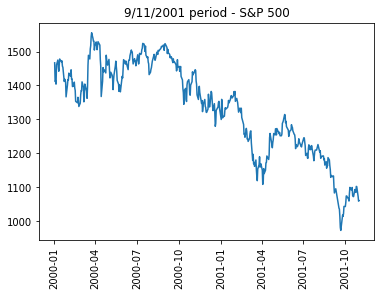

In [16]:
plt.plot(SP911_df['Date'],SP911_df['Settle'])
plt.title("9/11/2001 period - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [17]:
SPFC_df = SP500_df.loc[(SP500_df["Date"] >= "2007-01-02") & 
                                   (SP500_df["Date"] <= "2008-12-31")]
SPFC_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
3312,2007-01-03,-0.25,1433.8,1439.5,1417.0,1424.8,NaN,1424.8,37039,601655
3311,2007-01-04,0.19,1423.5,1431.5,1417.0,1427.5,NaN,1427.5,26119,604025
3310,2007-01-05,-0.78,1424.0,1424.2,1414.2,1416.4,NaN,1416.4,26551,601897
3309,2007-01-08,0.43,1418.5,1424.5,1413.0,1422.5,NaN,1422.5,22332,605742
3308,2007-01-09,-0.14,1423.0,1425.0,1414.0,1420.5,NaN,1420.5,29227,608999
...,...,...,...,...,...,...,...,...,...,...
2820,2008-12-24,0.75,860.0,866.2,856.1,865.0,NaN,865.0,16064,472261
2819,2008-12-26,0.45,865.0,871.6,863.3,868.9,NaN,868.9,11983,477081
2818,2008-12-29,0.17,869.0,873.6,853.0,870.4,NaN,870.4,5782,478187
2817,2008-12-30,2.05,870.0,888.8,869.0,888.2,NaN,888.2,16965,478207


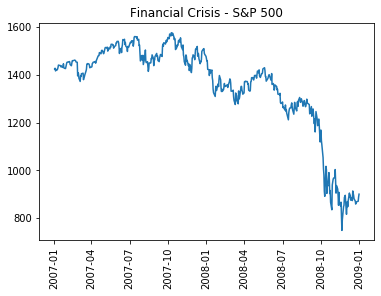

In [18]:
plt.plot(SPFC_df['Date'],SPFC_df['Settle'])
plt.title("Financial Crisis - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [19]:
SP500_Flash_df = SP500_df.loc[(SP500_df["Date"] >= "2010-02-01") & 
                                   (SP500_df["Date"] <= "2010-06-30")]

SP500_Flash_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
2547,2010-02-01,1.49,1069.7,1086.7,1068.4,1086.3,NaN,1086.3,24149,338829
2546,2010-02-02,1.00,1086.1,1101.5,1082.0,1097.2,NaN,1097.2,20642,344390
2545,2010-02-03,-0.07,1097.4,1100.0,1090.5,1096.4,NaN,1096.4,19815,349130
2544,2010-02-04,-3.16,1096.2,1098.2,1059.3,1061.7,NaN,1061.7,18889,350580
2543,2010-02-05,-0.18,1061.8,1064.8,1041.0,1059.8,NaN,1059.8,33641,354943
...,...,...,...,...,...,...,...,...,...,...
2448,2010-06-24,-1.55,1086.5,1090.7,1066.5,1070.5,NaN,1070.5,14217,293770
2447,2010-06-25,0.39,1070.0,1079.1,1063.0,1074.7,NaN,1074.7,23482,293460
2446,2010-06-28,-0.35,1074.8,1079.4,1067.0,1070.9,NaN,1070.9,16267,293803
2445,2010-06-29,-3.32,1070.4,1074.5,1030.5,1035.3,NaN,1035.3,9748,293745


In [20]:
SP500_debtc_df = SP500_df.loc[(SP500_df["Date"] >= "2011-09-01") & 
                                   (SP500_df["Date"] <= "2012-06-30")]

SP500_debtc_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
2152,2011-09-01,-1.35,1218.0,1228.0,1201.0,1201.3,NaN,1201.3,21176,368824
2151,2011-09-02,-2.66,1200.9,1203.1,1168.5,1169.3,NaN,1169.3,25754,372376
2150,2011-09-06,-0.41,1165.6,1166.5,1136.3,1164.5,NaN,1164.5,18530,376090
2149,2011-09-07,2.96,1166.0,1199.5,1164.2,1199.0,NaN,1199.0,22058,387017
2148,2011-09-08,-1.11,1199.1,1203.5,1182.5,1185.7,NaN,1185.7,39628,397798
...,...,...,...,...,...,...,...,...,...,...
1948,2012-06-25,-1.52,1325.5,1326.0,1302.7,1306.6,NaN,1306.6,7763,212389
1947,2012-06-26,0.68,1306.9,1317.8,1303.7,1315.5,NaN,1315.5,7027,213446
1946,2012-06-27,0.76,1315.6,1328.2,1312.2,1325.5,NaN,1325.5,9609,212695
1945,2012-06-28,-0.23,1326.0,1327.7,1307.0,1322.4,NaN,1322.4,10859,215637


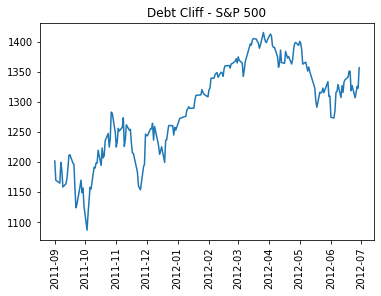

In [21]:
plt.plot(SP500_debtc_df['Date'],SP500_debtc_df['Settle'])
plt.title("Debt Cliff - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [22]:
SP500_Chinablack_df = SP500_df.loc[(SP500_df["Date"] >= "2015-01-02") & 
                                   (SP500_df["Date"] <= "2016-03-01")]

SP500_Chinablack_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
1312,2015-01-02,-0.30,2055.0,2067.0,2039.5,2046.0,6.1,2046.3,5704,123911
1311,2015-01-05,-1.49,2043.7,2048.1,2010.0,2016.2,30.4,2015.9,11355,124285
1310,2015-01-06,-1.07,2018.9,2023.2,1984.0,1994.9,21.5,1994.4,11845,125744
1309,2015-01-07,1.26,1997.1,2024.0,1995.8,2020.0,25.2,2019.6,4685,122933
1308,2015-01-08,1.75,2021.2,2058.3,2020.8,2054.5,35.4,2055.0,9723,123385
...,...,...,...,...,...,...,...,...,...,...
1025,2016-02-24,0.74,1913.8,1933.2,1887.0,1930.0,14.1,1930.2,7762,138749
1024,2016-02-25,1.05,1932.0,1951.0,1920.7,1950.5,20.2,1950.4,6512,141880
1023,2016-02-26,-0.39,1949.7,1968.7,1941.8,1942.7,7.7,1942.7,7651,142774
1022,2016-02-29,-0.68,1941.0,1956.0,1927.0,1930.0,13.2,1929.5,7045,139705


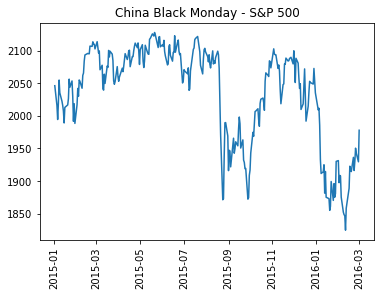

In [23]:
plt.plot(SP500_Chinablack_df['Date'],SP500_Chinablack_df['Settle'])
plt.title("China Black Monday - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [24]:
SP500_2018_df = SP500_df.loc[(SP500_df["Date"] >= "2017-01-02") & 
                                   (SP500_df["Date"] <= "2018-07-31")]

SP500_2018_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
808,2017-01-03,0.73,2239.7,2259.0,2239.7,2252.7,16.4,2252.6,5129,63489
807,2017-01-04,0.52,2252.7,2267.0,2251.6,2264.5,11.7,2264.3,5904,64288
806,2017-01-05,0.00,2264.5,2265.4,2254.0,2264.5,NaN,2264.3,5947,62499
805,2017-01-06,0.32,2265.3,2276.5,2258.5,2271.5,7.2,2271.5,3695,62093
804,2017-01-09,-0.29,2272.0,2274.9,2263.5,2265.1,6.5,2265.0,2704,60355
...,...,...,...,...,...,...,...,...,...,...
416,2018-07-25,0.72,2816.0,2849.0,2814.5,2841.5,20.3,2841.3,2215,62742
415,2018-07-26,0.04,2836.8,2846.0,2833.7,2842.5,1.2,2842.5,2020,62726
414,2018-07-27,-0.88,2844.8,2846.7,2809.5,2817.0,25.0,2817.5,1353,63250
413,2018-07-30,-0.51,2810.6,2821.5,2799.0,2803.0,14.3,2803.2,1648,62372


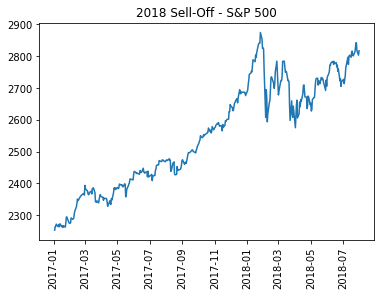

In [25]:
plt.plot(SP500_2018_df['Date'],SP500_2018_df['Settle'])
plt.title("2018 Sell-Off - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [26]:
SP500_Covid_df = SP500_df.loc[(SP500_df["Date"] >= "2019-01-02") & 
                                   (SP500_df["Date"] <= "2020-03-17")]

SP500_Covid_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
305,2019-01-02,0.23,2511.4,2520.9,2453.0,2511.5,5.8,2511.0,1302,36741
304,2019-01-03,-2.52,2480.9,2492.5,2445.0,2449.0,63.3,2447.7,2281,36333
303,2019-01-04,3.42,2453.4,2538.0,2439.0,2531.0,83.6,2531.3,5884,37192
302,2019-01-07,0.76,2536.7,2567.0,2524.2,2550.5,19.3,2550.6,4837,39216
301,2019-01-08,0.85,2550.7,2581.0,2549.0,2571.8,21.8,2572.4,3548,42609
...,...,...,...,...,...,...,...,...,...,...
6,2020-03-11,-4.38,2866.4,2868.7,2704.0,2741.5,125.5,2740.3,12342,95458
5,2020-03-12,-9.90,2746.6,2772.9,2459.0,2468.0,271.4,2468.9,13599,102626
4,2020-03-13,9.19,2614.0,2703.0,2490.0,2695.0,227.0,2695.9,13217,107183
3,2020-03-16,-10.38,NaN,NaN,NaN,NaN,279.7,2416.2,10105,107994


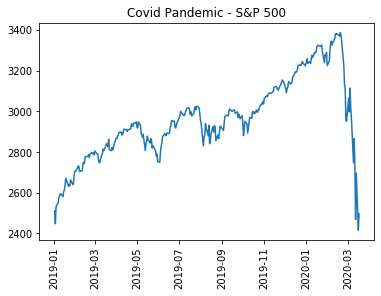

In [27]:
plt.plot(SP500_Covid_df['Date'],SP500_Covid_df['Settle'])
plt.title("Covid Pandemic - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [28]:
Tsy = 'US_Yield_Curve.csv'
bond_yield_df = pd.read_csv(Tsy)
print(bond_yield_df.shape)

(7560, 13)


In [29]:
copper = 'Copper1MFutures.csv'
copper_df = pd.read_csv(copper)
print(copper_df.shape)


(15202, 9)


In [30]:
gold = 'Gold1MFutures.csv'
gold_df = pd.read_csv(gold)
print(copper_df.shape)


(15202, 9)


In [31]:
copp_gold_df = pd.merge(gold_df, copper_df, on=["Date"])
copp_gold_df.head()


,Date,Open_x,High_x,Low_x,Last_x,Change_x,Settle_x,Volume_x,Previous Day Open Interest_x,Open_y,High_y,Low_y,Last_y,Change_y,Settle_y,Volume_y,Previous Day Open Interest_y
0,3/20/2020,1483.5,1483.5,1483.5,1483.5,5.4,1484.0,14,275,2.1620,2.2410,2.1200,2.1680,0.0095,2.1905,194,1429
1,3/19/2020,1481.5,1491.6,1471.0,1476.0,1.3,1478.6,262,133,2.1615,2.1995,2.0595,2.1855,0.0395,2.2000,242,1613
2,3/18/2020,1537.5,1542.0,1484.6,1488.2,47.6,1477.3,333,84,2.3160,2.3225,2.1220,2.1555,0.1550,2.1605,205,1777
3,3/17/2020,1469.3,1537.7,1469.3,1525.5,39.0,1524.9,122,64,2.4170,2.4170,2.3090,2.3135,0.0830,2.3155,296,2068
4,3/16/2020,1569.1,1569.1,1452.1,1502.6,29.8,1485.9,193,51,2.4550,2.4600,2.3640,2.3800,0.0755,2.3985,516,2284


In [32]:
copp_gold_df = pd.DataFrame({
    "Date": copp_gold_df["Date"],
    "Gold Price": copp_gold_df["Settle_x"],
    "Copper Price": copp_gold_df["Settle_y"]
})
copp_gold_df

,Date,Gold Price,Copper Price
0,3/20/2020,1484.0,2.1905
1,3/19/2020,1478.6,2.2000
2,3/18/2020,1477.3,2.1605
3,3/17/2020,1524.9,2.3155
4,3/16/2020,1485.9,2.3985
...,...,...,...
11342,1/7/1975,173.4,0.5200
11343,1/6/1975,174.4,0.5130
11344,1/3/1975,174.7,0.5220
11345,1/2/1975,175.1,0.5210


In [33]:
gold_copp_ratio = (copp_gold_df["Copper Price"] / copp_gold_df["Gold Price"])

In [34]:
copp_gold_df.insert(3,"GoldCopperRatio", gold_copp_ratio)
copp_gold_df.head()                                       


,Date,Gold Price,Copper Price,GoldCopperRatio
0,3/20/2020,1484.0,2.1905,0.001476
1,3/19/2020,1478.6,2.2000,0.001488
2,3/18/2020,1477.3,2.1605,0.001462
3,3/17/2020,1524.9,2.3155,0.001518
4,3/16/2020,1485.9,2.3985,0.001614


In [35]:
copp_gold_df = copp_gold_df.sort_index(axis=0, ascending=False)
copp_gold_df.head()


,Date,Gold Price,Copper Price,GoldCopperRatio
11346,12/31/1974,183.9,0.524,0.002849
11345,1/2/1975,175.1,0.521,0.002975
11344,1/3/1975,174.7,0.522,0.002988
11343,1/6/1975,174.4,0.513,0.002942
11342,1/7/1975,173.4,0.520,0.002999


In [36]:
copp_gold_percent_chg = []
previous_price = .002849
for index , row in copp_gold_df.iterrows():
    GcR_row = row["GoldCopperRatio"]
    GcR_daily_pctchg = (GcR_row - previous_price) / previous_price *100
    copp_gold_percent_chg.append(round(GcR_daily_pctchg, 2))
    previous_price = GcR_row
copp_gold_df.insert(1,"Gold-Copp Dly Ret", copp_gold_percent_chg)
copp_gold_df.head()



,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
11346,12/31/1974,0.01,183.9,0.524,0.002849
11345,1/2/1975,4.42,175.1,0.521,0.002975
11344,1/3/1975,0.42,174.7,0.522,0.002988
11343,1/6/1975,-1.56,174.4,0.513,0.002942
11342,1/7/1975,1.95,173.4,0.520,0.002999


In [37]:
copp_gold_df["Date"] = pd.to_datetime(copp_gold_df["Date"])

In [38]:
copp_gold_years_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1980-12-31") & 
                                   (copp_gold_df["Date"] <= "2020-01-02")]

copp_gold_years_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
9841,1980-12-31,-0.15,599.5,0.8375,0.001397
9840,1981-01-02,2.77,594.5,0.8535,0.001436
9839,1981-01-05,2.25,601.5,0.8830,0.001468
9838,1981-01-06,-1.70,605.0,0.8730,0.001443
9837,1981-01-07,2.70,580.0,0.8595,0.001482
...,...,...,...,...,...
58,2019-12-26,0.23,1509.3,2.8645,0.001898
57,2019-12-27,-1.27,1513.8,2.8365,0.001874
56,2019-12-30,-0.63,1518.6,2.8275,0.001862
55,2019-12-31,-1.48,1523.1,2.7940,0.001834


In [39]:
copp_gold_87_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1987-01-01") & 
                                   (copp_gold_df["Date"] <= "1987-10-31")]

copp_gold_87_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
8328,1987-01-02,1.05,404.0,0.6060,0.001500
8327,1987-01-05,1.15,405.0,0.6145,0.001517
8326,1987-01-06,0.37,402.2,0.6125,0.001523
8325,1987-01-07,-0.68,404.3,0.6115,0.001512
8324,1987-01-08,0.02,403.9,0.6110,0.001513
...,...,...,...,...,...
8122,1987-10-26,-3.93,476.2,0.7895,0.001658
8121,1987-10-27,1.75,475.7,0.8025,0.001687
8120,1987-10-28,0.55,477.5,0.8100,0.001696
8119,1987-10-29,0.18,468.7,0.7965,0.001699


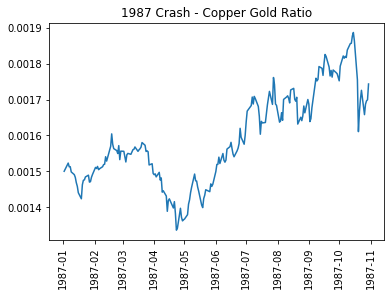

In [40]:
plt.plot(copp_gold_87_df['Date'],copp_gold_87_df['GoldCopperRatio'])
plt.title("1987 Crash - Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [41]:
copp_gold_ltcm_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1997-10-01") & 
                                   (copp_gold_df["Date"] <= "1998-10-31")]

copp_gold_ltcm_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
5623,1997-10-01,-0.16,333.6,0.9530,0.002857
5622,1997-10-02,-2.12,331.0,0.9255,0.002796
5621,1997-10-03,-0.92,334.6,0.9270,0.002770
5620,1997-10-06,1.40,332.3,0.9335,0.002809
5619,1997-10-07,0.77,331.0,0.9370,0.002831
...,...,...,...,...,...
5355,1998-10-26,-0.80,292.2,0.7165,0.002452
5354,1998-10-27,-1.35,293.5,0.7100,0.002419
5353,1998-10-28,-0.74,293.2,0.7040,0.002401
5352,1998-10-29,0.52,294.8,0.7115,0.002414


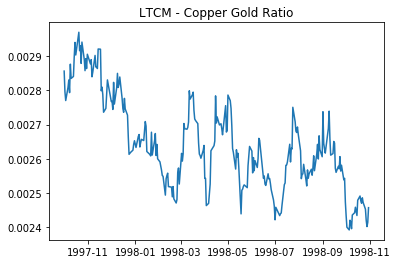

In [42]:
plt.plot(copp_gold_ltcm_df['Date'],copp_gold_ltcm_df['GoldCopperRatio'])
plt.title("LTCM - Copper Gold Ratio")
plt.show()

In [43]:
copp_gold_tech_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1999-01-02") & 
                                   (copp_gold_df["Date"] <= "2000-09-30")]

copp_gold_tech_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
5309,1999-01-04,-2.56,288.3,0.6445,0.002236
5308,1999-01-05,-0.68,287.8,0.6390,0.002220
5307,1999-01-06,0.77,288.5,0.6455,0.002237
5306,1999-01-07,-1.33,292.4,0.6455,0.002208
5305,1999-01-08,1.30,292.0,0.6530,0.002236
...,...,...,...,...,...
4877,2000-09-25,0.04,274.4,0.9270,0.003378
4876,2000-09-26,-1.06,274.2,0.9165,0.003342
4875,2000-09-27,-1.94,278.4,0.9125,0.003278
4874,2000-09-28,0.85,275.6,0.9110,0.003306


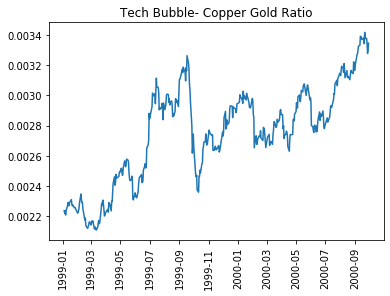

In [44]:
plt.plot(copp_gold_tech_df['Date'],copp_gold_tech_df['GoldCopperRatio'])
plt.title("Tech Bubble- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [45]:
copp_gold_911_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2000-01-02") & 
                                   (copp_gold_df["Date"] <= "2001-10-31")]

copp_gold_911_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
5059,2000-01-04,0.34,283.7,0.8380,0.002954
5058,2000-01-05,1.71,282.1,0.8475,0.003004
5057,2000-01-06,-0.40,282.4,0.8450,0.002992
5056,2000-01-07,-0.12,282.9,0.8455,0.002989
5055,2000-01-10,-0.64,282.7,0.8395,0.002970
...,...,...,...,...,...
4606,2001-10-25,-0.20,277.8,0.6210,0.002235
4605,2001-10-26,1.49,277.9,0.6305,0.002269
4604,2001-10-29,-0.75,279.1,0.6285,0.002252
4603,2001-10-30,0.12,281.2,0.6340,0.002255


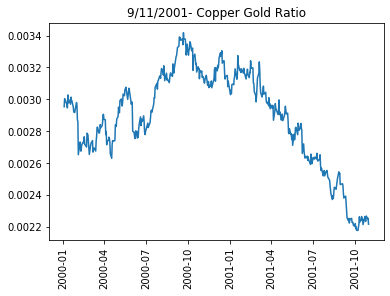

In [46]:
plt.plot(copp_gold_911_df['Date'],copp_gold_911_df['GoldCopperRatio'])
plt.title("9/11/2001- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [47]:
copp_gold_FC_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2007-01-02") & 
                                   (copp_gold_df["Date"] <= "2008-12-31")]

copp_gold_FC_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
3314,2007-01-03,-6.56,629.8,2.6325,0.004180
3313,2007-01-04,-1.11,626.2,2.5885,0.004134
3312,2007-01-05,0.55,606.9,2.5225,0.004156
3311,2007-01-08,-0.73,609.4,2.5145,0.004126
3310,2007-01-09,0.17,615.0,2.5420,0.004133
...,...,...,...,...,...
2816,2008-12-24,-1.60,847.1,1.2475,0.001473
2815,2008-12-26,-0.57,870.4,1.2745,0.001464
2814,2008-12-29,1.28,874.6,1.2970,0.001483
2813,2008-12-30,1.30,870.0,1.3070,0.001502


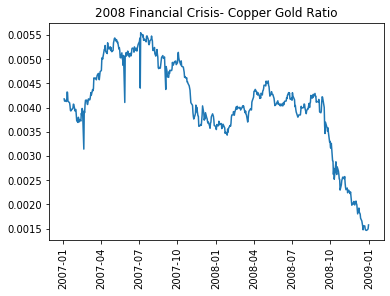

In [48]:
plt.plot(copp_gold_FC_df['Date'],copp_gold_FC_df['GoldCopperRatio'])
plt.title("2008 Financial Crisis- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [49]:
copp_gold_flash_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2010-02-01") & 
                                   (copp_gold_df["Date"] <= "2010-06-30")]

copp_gold_flash_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
2543,2010-02-01,-0.88,1104.3,3.0785,0.002788
2542,2010-02-02,-0.96,1117.4,3.0850,0.002761
2541,2010-02-03,-3.27,1111.4,2.9680,0.002671
2540,2010-02-04,1.35,1062.4,2.8755,0.002707
2539,2010-02-05,0.21,1052.2,2.8540,0.002712
...,...,...,...,...,...
2444,2010-06-24,1.41,1245.5,3.0030,0.002411
2443,2010-06-25,2.15,1255.8,3.0930,0.002463
2442,2010-06-28,0.62,1238.2,3.0685,0.002478
2441,2010-06-29,-5.31,1242.4,2.9155,0.002347


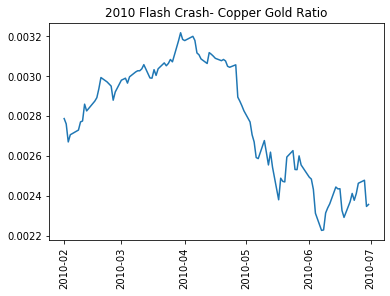

In [50]:
plt.plot(copp_gold_flash_df['Date'],copp_gold_flash_df['GoldCopperRatio'])
plt.title("2010 Flash Crash- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [51]:
copp_gold_debt_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2011-09-01") & 
                                   (copp_gold_df["Date"] <= "2012-06-30")]

copp_gold_debt_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
2147,2011-09-01,-0.92,1826.7,4.1425,0.002268
2146,2011-09-02,-3.38,1874.4,4.1070,0.002191
2145,2011-09-06,-1.44,1870.6,4.0395,0.002159
2144,2011-09-07,5.01,1814.9,4.1155,0.002268
2143,2011-09-08,-1.88,1855.2,4.1280,0.002225
...,...,...,...,...,...
1944,2012-06-25,-1.09,1587.5,3.3140,0.002088
1943,2012-06-26,0.90,1574.0,3.3155,0.002106
1942,2012-06-27,0.71,1577.5,3.3465,0.002121
1941,2012-06-28,1.12,1550.4,3.3260,0.002145


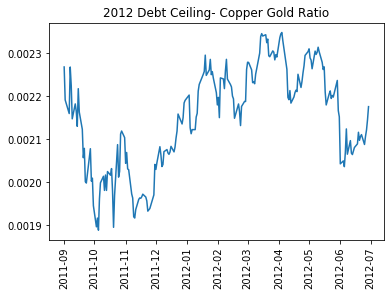

In [52]:
plt.plot(copp_gold_debt_df['Date'],copp_gold_debt_df['GoldCopperRatio'])
plt.title("2012 Debt Ceiling- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [53]:
copp_gold_china_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2015-01-02") & 
                                   (copp_gold_df["Date"] <= "2016-03-01")]

copp_gold_china_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
1311,2015-01-02,-0.18,1186.2,2.8385,0.002393
1310,2015-01-05,-3.06,1204.0,2.7930,0.002320
1309,2015-01-06,-0.87,1219.4,2.8040,0.002299
1308,2015-01-07,0.43,1210.7,2.7960,0.002309
1307,2015-01-08,0.58,1208.5,2.8070,0.002323
...,...,...,...,...,...
1025,2016-02-24,-1.77,1238.7,2.0950,0.001691
1024,2016-02-25,-1.39,1238.2,2.0650,0.001668
1023,2016-02-26,4.11,1219.8,2.1180,0.001736
1022,2016-02-29,-0.65,1233.9,2.1285,0.001725


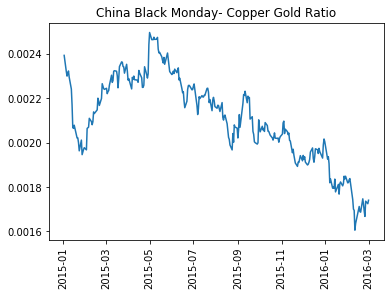

In [54]:
plt.plot(copp_gold_china_df['Date'],copp_gold_china_df['GoldCopperRatio'])
plt.title("China Black Monday- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [55]:
copp_gold_2018_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2017-01-02") & 
                                   (copp_gold_df["Date"] <= "2018-07-31")]

copp_gold_2018_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
808,2017-01-03,-1.54,1162.0,2.4810,0.002135
807,2017-01-04,2.41,1165.3,2.5480,0.002187
806,2017-01-05,-2.07,1181.3,2.5295,0.002141
805,2017-01-06,1.01,1173.4,2.5380,0.002163
804,2017-01-09,-1.28,1184.9,2.5300,0.002135
...,...,...,...,...,...
417,2018-07-25,-0.30,1231.8,2.8060,0.002278
416,2018-07-26,0.43,1225.7,2.8040,0.002288
415,2018-07-27,-0.37,1223.0,2.7875,0.002279
414,2018-07-30,-0.17,1221.3,2.7790,0.002275


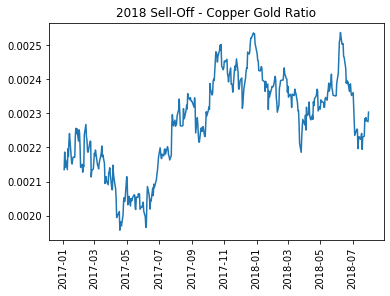

In [56]:
plt.plot(copp_gold_2018_df['Date'],copp_gold_2018_df['GoldCopperRatio'])
plt.title("2018 Sell-Off - Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [57]:
copp_gold_covid_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2019-01-02") & 
                                   (copp_gold_df["Date"] <= "2020-03-17")]

copp_gold_covid_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
306,2019-01-02,-0.33,1284.1,2.6250,0.002044
305,2019-01-03,-2.89,1294.8,2.5705,0.001985
304,2019-01-04,3.87,1285.8,2.6515,0.002062
303,2019-01-07,-0.71,1289.9,2.6410,0.002047
302,2019-01-08,1.05,1285.9,2.6605,0.002069
...,...,...,...,...,...
7,2020-03-11,0.20,1641.4,2.5120,0.001530
6,2020-03-12,2.00,1589.3,2.4810,0.001561
5,2020-03-13,4.56,1515.7,2.4740,0.001632
4,2020-03-16,-1.11,1485.9,2.3985,0.001614


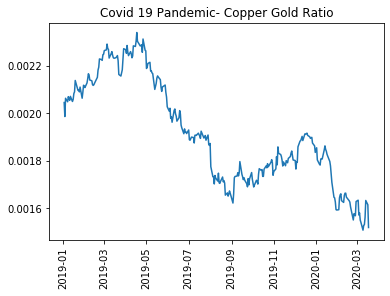

In [58]:
plt.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['GoldCopperRatio'])
plt.title("Covid 19 Pandemic- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [59]:
copp_gold__SP_df = pd.merge(copp_gold_df, SP500_df, on=["Date"])

copp_gold__SP_df.head()


,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1982-04-21,1.64,344.4,0.6950,0.002018,0.00,116.35,117.60,116.05,117.45,NaN,117.45,3696,412
1,1982-04-22,0.63,344.7,0.7000,0.002031,0.38,117.00,118.40,117.00,117.90,NaN,117.90,2827,719
2,1982-04-23,-2.28,352.0,0.6985,0.001984,1.48,118.40,119.75,118.25,119.65,NaN,119.65,2933,946
3,1982-04-26,0.86,352.0,0.7045,0.002001,0.75,119.30,120.60,118.65,120.55,NaN,120.55,2871,1084
4,1982-04-27,-1.52,355.9,0.7015,0.001971,-1.41,120.20,120.35,118.40,118.85,NaN,118.85,3854,1142


In [60]:
copp_gold__SP_df["Date"] = pd.to_datetime(copp_gold__SP_df["Date"])

In [61]:
copp_gold__SP_df.tail()

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
9497,2020-03-13,4.56,1515.7,2.4740,0.001632,9.19,2614.0,2703.0,2490.0,2695.0,227.0,2695.9,13217,107183
9498,2020-03-16,-1.11,1485.9,2.3985,0.001614,-10.38,NaN,NaN,NaN,NaN,279.7,2416.2,10105,107994
9499,2020-03-17,-5.93,1524.9,2.3155,0.001518,3.28,NaN,NaN,NaN,NaN,79.3,2495.5,10460,109967
9500,2020-03-18,-3.69,1477.3,2.1605,0.001462,-3.27,NaN,NaN,NaN,NaN,81.5,2414.0,5300,108108
9501,2020-03-19,1.74,1478.6,2.2000,0.001488,-0.44,NaN,NaN,NaN,NaN,10.7,2403.3,4764,108057


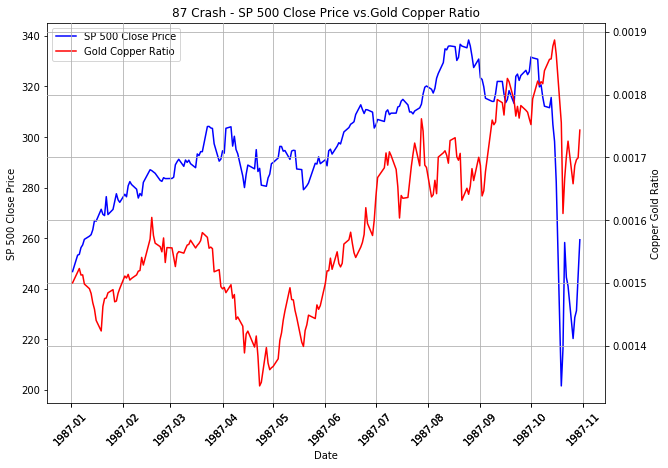

In [75]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP87_df['Date'], SP87_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_87_df['Date'],copp_gold_87_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("87 Crash - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

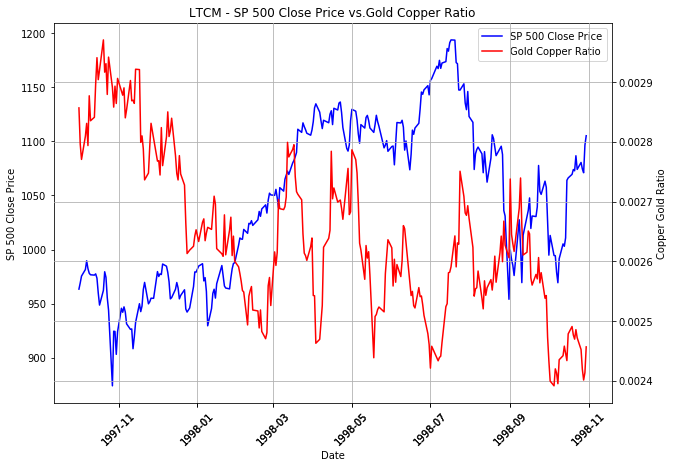

In [78]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPLTCM_df['Date'], SPLTCM_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_ltcm_df['Date'],copp_gold_ltcm_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("LTCM - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

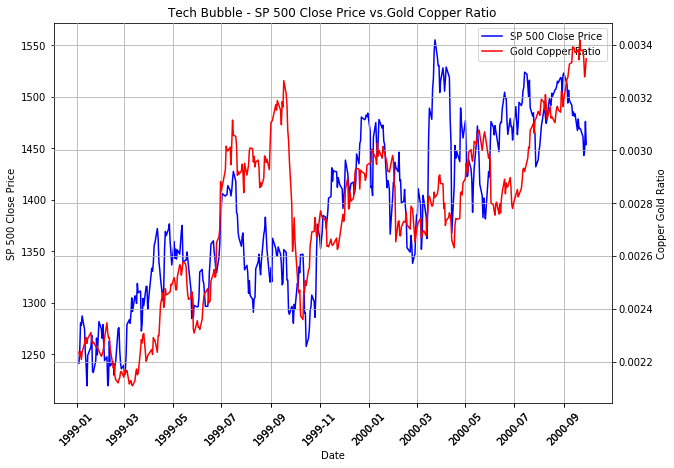

In [80]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPtech_df['Date'], SPtech_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_tech_df['Date'],copp_gold_tech_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("Tech Bubble - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

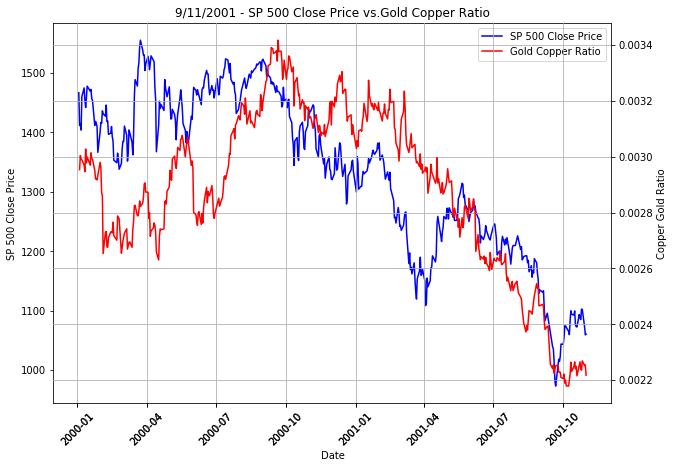

In [81]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP911_df['Date'], SP911_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_911_df['Date'],copp_gold_911_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("9/11/2001 - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

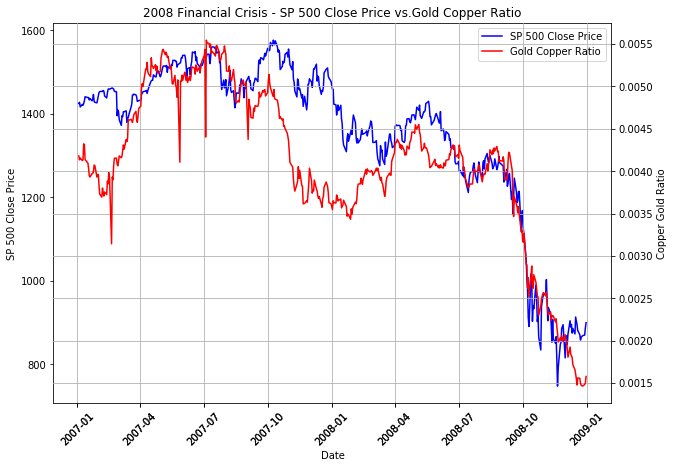

In [82]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPFC_df['Date'], SPFC_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_FC_df['Date'],copp_gold_FC_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("2008 Financial Crisis - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [63]:
print(copp_gold__SP_df.isnull().sum())
print(copp_gold__SP_df.shape)

Date                             0
Gold-Copp Dly Ret                0
Gold Price                       0
Copper Price                     0
GoldCopperRatio                  0
SP Daily Pct Return              0
Open                            13
High                            13
Low                             13
Last                            14
Change                        7991
Settle                           0
Volume                           0
Previous Day Open Interest       0
dtype: int64
(9502, 14)


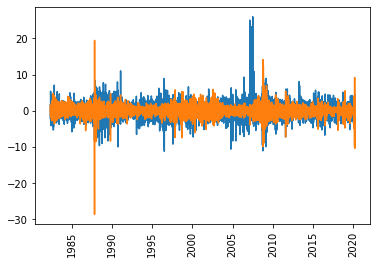

In [70]:
plt.plot(copp_gold__SP_df['Date'],copp_gold__SP_df['Gold-Copp Dly Ret'])
plt.plot(copp_gold__SP_df['Date'],copp_gold__SP_df['SP Daily Pct Return'])
plt.xlim = (-10,10)
#plt.scatter(copp_gold__SP_df['Date'],copp_gold__SP_df['Copper Price'])

#plt.title("SP 500 daily returns % vs CopperGold Ratio daily change %")
plt.xticks(rotation = 90)
plt.show()